# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

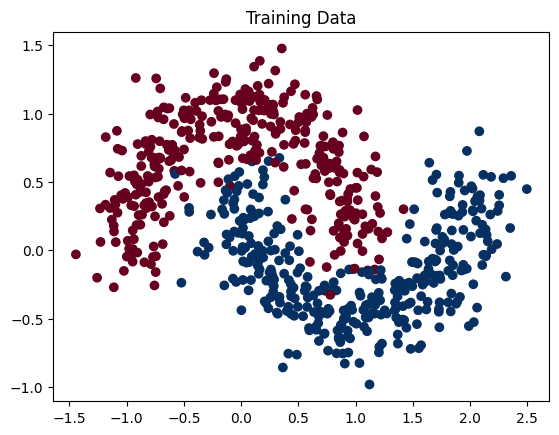

In [2]:
# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu)
plt.title("Training Data")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [3]:
def build_model(activation_function='relu', loss_function='binary_crossentropy', depth=1, width=10):
    tf.keras.utils.set_random_seed(42)
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(width, activation=activation_function, input_shape=(2,)),
        *[tf.keras.layers.Dense(width, activation=activation_function)] * (depth - 1),
        tf.keras.layers.Dense(width, activation=activation_function),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    return model


# Training and evaluating the model
Let's train the model and see how well it solves the problem.

10/10 [==============================] - 0s 2ms/step


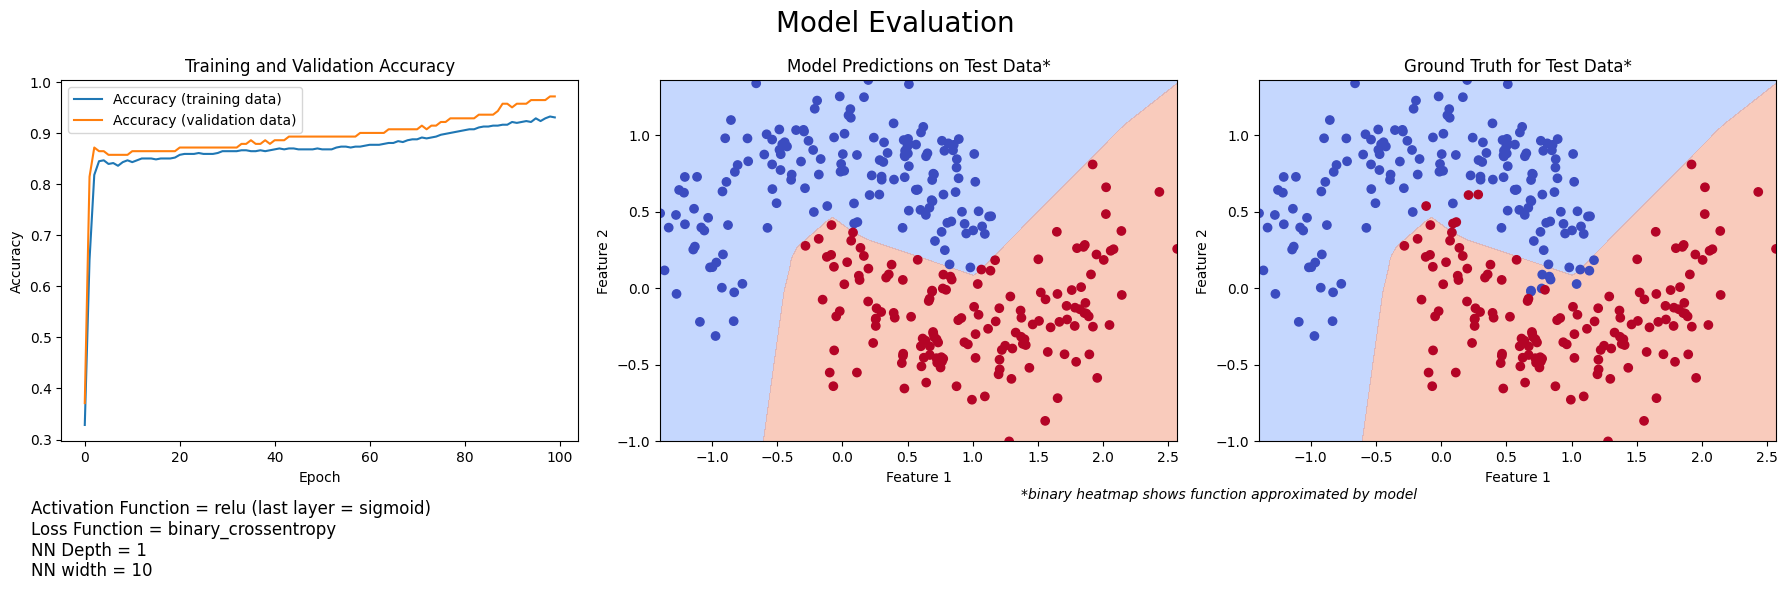

Test Loss: 0.1437
Test Accuracy: 0.9500


In [4]:
# Function to train, evaluate, and visualize model predictions along with ground truth
def train_and_evaluate_model(model, epochs=100):
    tf.keras.utils.set_random_seed(42)

    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2, shuffle=True)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # get model properties
    depth = len(model.layers) - 2
    width = max([layer.output_shape[1] for layer in model.layers if hasattr(layer, 'output_shape')])

    loss_function = model.loss
    activation_function = model.layers[0].activation.__name__ if hasattr(model.layers[0].activation, '__name__') else model.layers[0].activation
    last_activation_function = model.layers[-1].activation.__name__ if hasattr(model.layers[-1].activation, '__name__') else model.layers[-1].activation

    # Generate points for plotting the function
    x_points = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
    y_points = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100)
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    xy_points = np.column_stack((x_mesh.ravel(), y_mesh.ravel()))

    # Predict using the model
    predicted_values = model.predict(xy_points)

    
    # Plotting training history
    plt.figure(figsize=(18, 5))
    plt.suptitle(f"Model Evaluation", size=20)
    # plt.text(0.5, -0.1, 'Heatmap shows function approximated by model', ha='center', va='center', fontsize=6)

    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions
    plt.subplot(1, 3, 2)
    plt.contourf(x_mesh, y_mesh, predicted_values.reshape(x_mesh.shape), levels=[0, 0.5, 1], cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0], cmap=plt.cm.coolwarm)
    plt.title('Model Predictions on Test Data*')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.contourf(x_mesh, y_mesh, predicted_values.reshape(x_mesh.shape), levels=[0, 0.5, 1], cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    plt.title('Ground Truth for Test Data*')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # 
    model_stats = f"Activation Function = {activation_function} (last layer = {last_activation_function})\nLoss Function = {loss_function}\nNN Depth = {depth}\nNN width = {width}"
    plt.figtext(0.02, -0.08, model_stats, ha='left', va='center', transform=plt.gcf().transFigure, fontsize=12)
    plt.figtext(0.68, 0.01, '*binary heatmap shows function approximated by model', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=10, fontstyle='italic')

    plt.tight_layout()
    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Example of using the function with a specific activation and loss function
model = build_model(activation_function='relu', loss_function='binary_crossentropy')
train_and_evaluate_model(model, epochs=100)


before test
Assumption that MSE loss and sigmoid activation will be best

# Experimentation
## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.

10/10 [==============================] - 0s 2ms/step


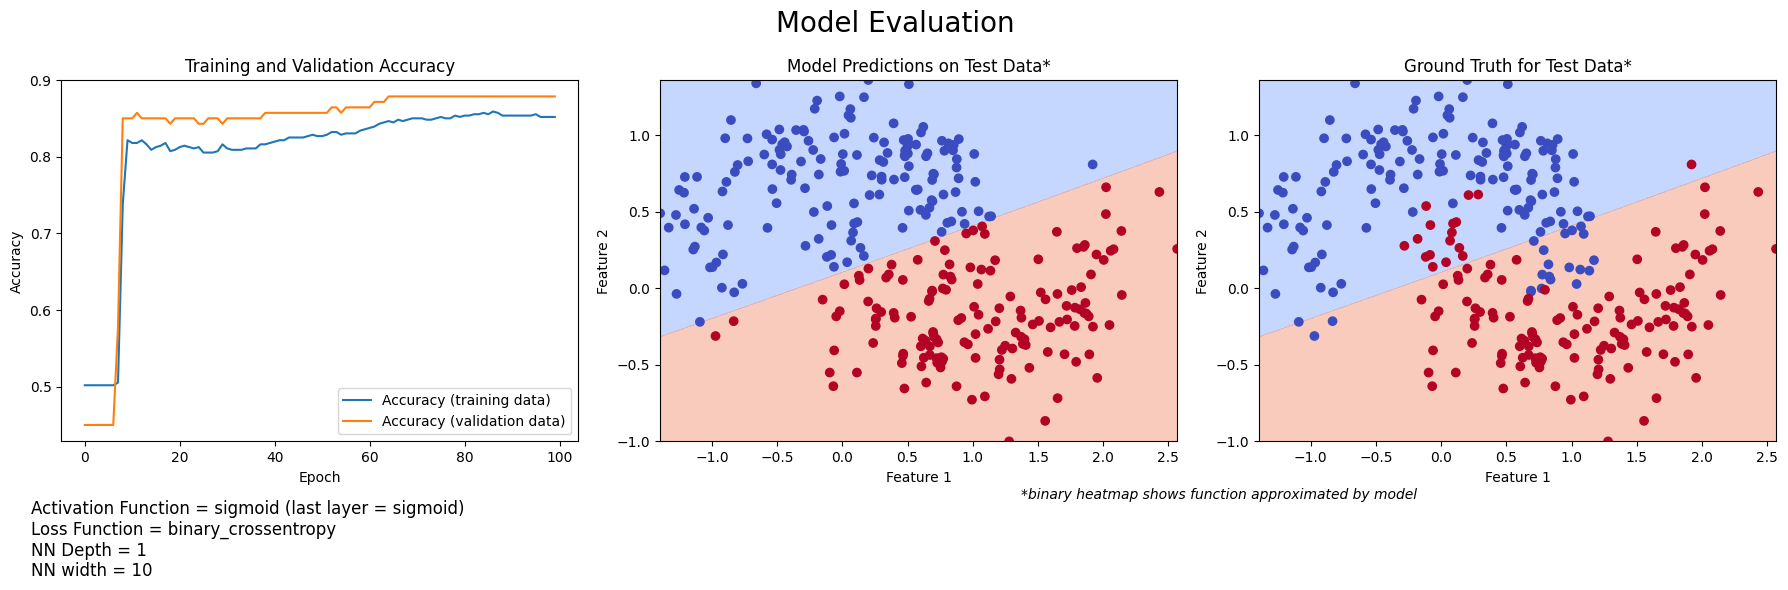

Test Loss: 0.2849
Test Accuracy: 0.8767
10/10 [==============================] - 0s 1ms/step


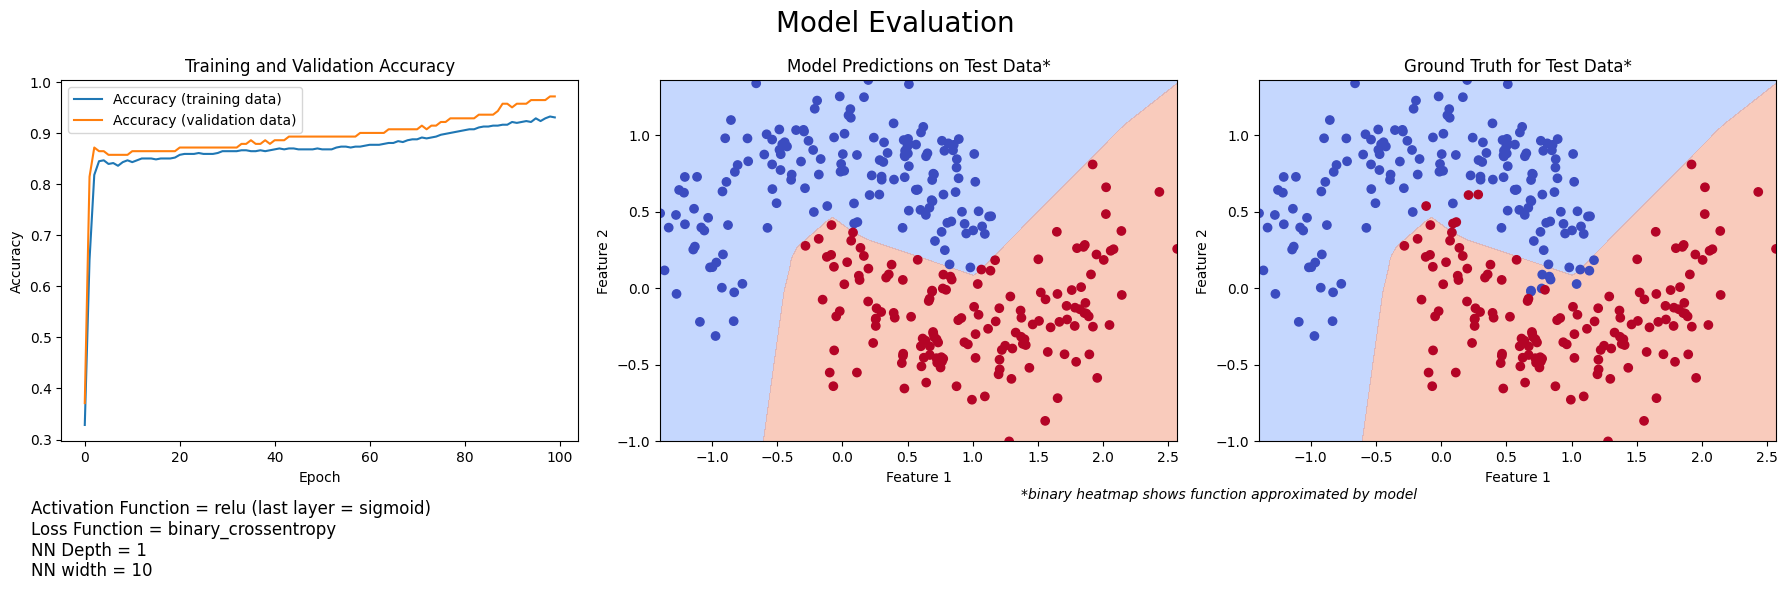

Test Loss: 0.1437
Test Accuracy: 0.9500
10/10 [==============================] - 0s 2ms/step


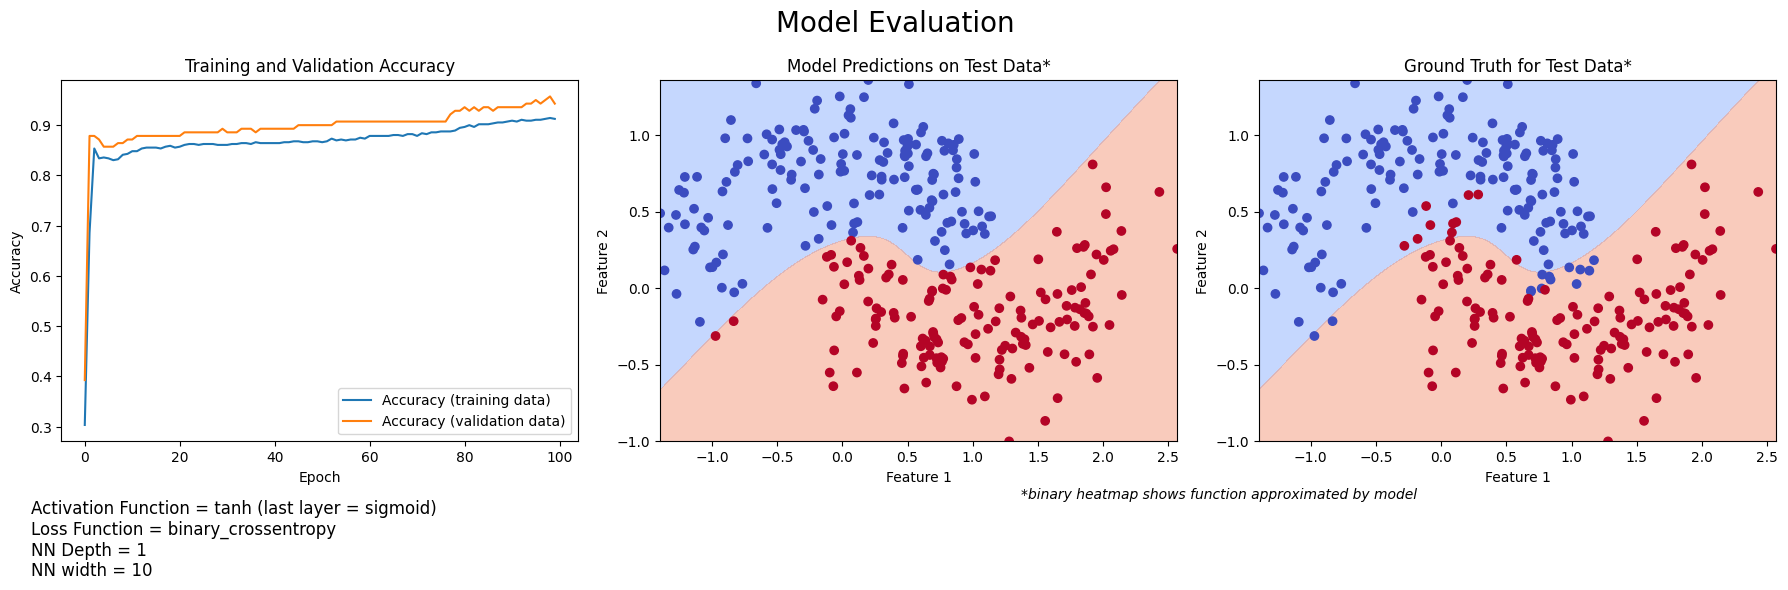

Test Loss: 0.1662
Test Accuracy: 0.9233


In [5]:
activation_functions = ["sigmoid", "relu", "tanh"]
for activation_function in activation_functions:
    model = build_model(activation_function=activation_function, loss_function='binary_crossentropy')
    train_and_evaluate_model(model, epochs=100)

## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.

10/10 [==============================] - 0s 1ms/step


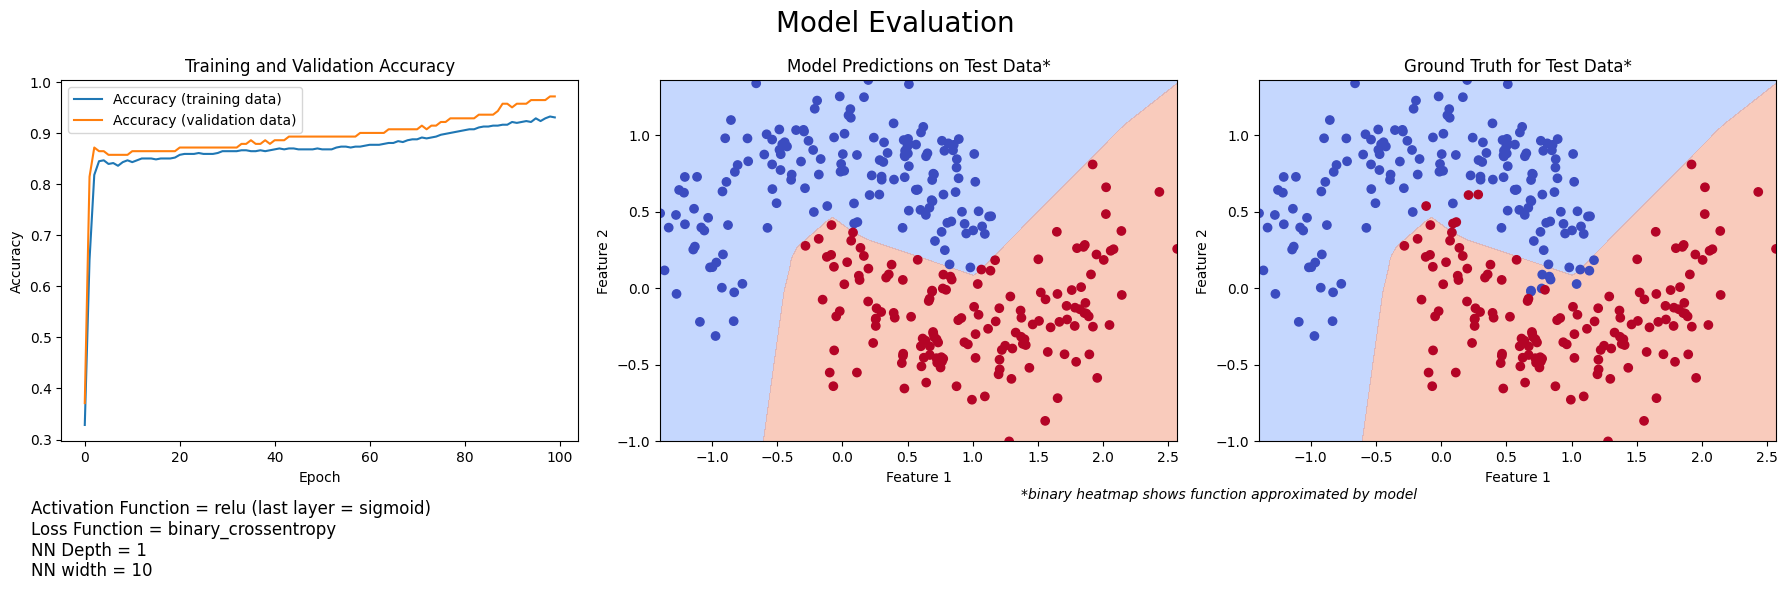

Test Loss: 0.1437
Test Accuracy: 0.9500
10/10 [==============================] - 0s 2ms/step


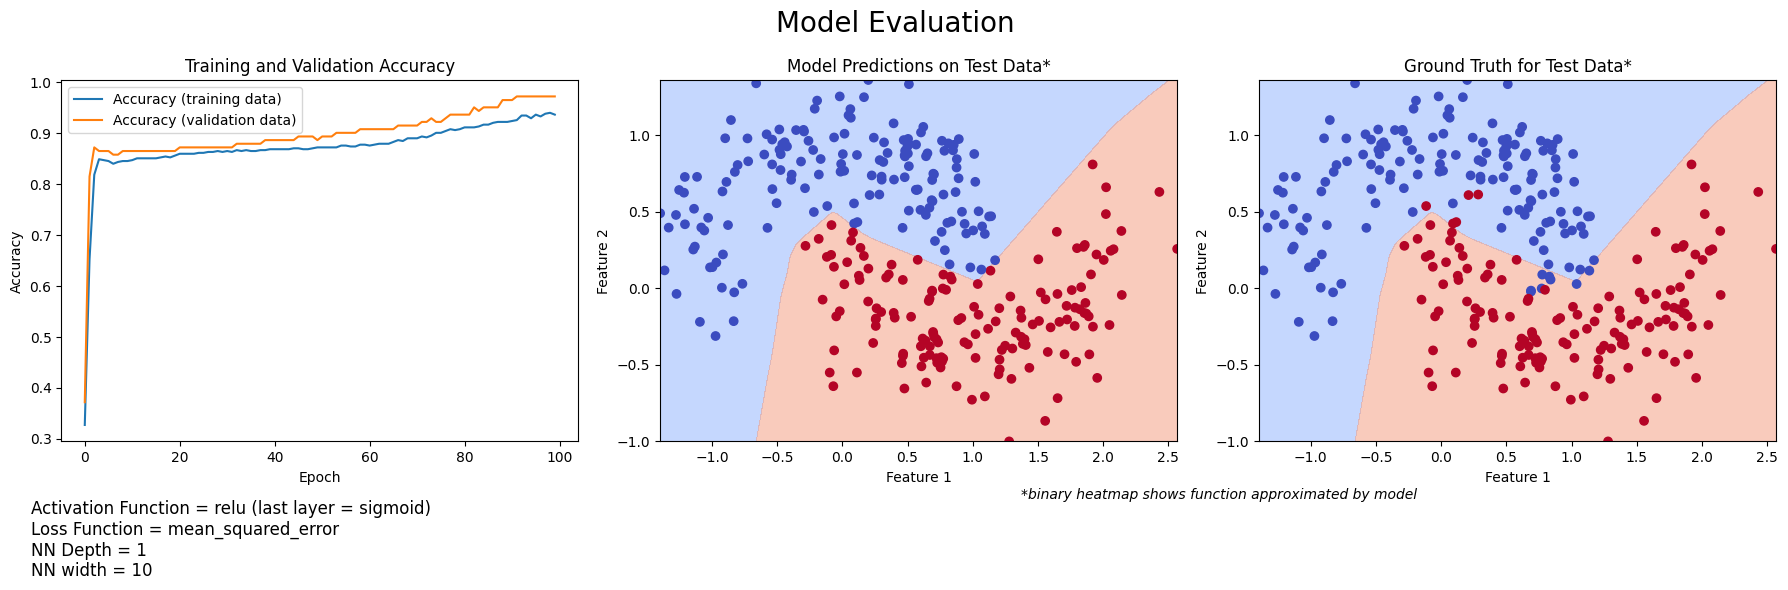

Test Loss: 0.0409
Test Accuracy: 0.9567


In [6]:
loss_functions = ["binary_crossentropy", "mean_squared_error"]
for loss_function in loss_functions:
    model = build_model(activation_function='relu', loss_function=loss_function)
    train_and_evaluate_model(model, epochs=100)

# Analysis and Questions
After completing the tasks, answer the following questions:

1. How did different activation functions affect the model's performance?
2. How did different loss functions impact the learning process and accuracy?
3. Which combination of activation and loss function provided the best results for this task?

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.